# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведём исследовательский анализ данных и установим параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Открытие файла с данными и изучение общей информации

In [ ]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.')

Загружены данные из csv-файла.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Выведена общая информация о датафрейме. 

In [ ]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведены первые 10 строк.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

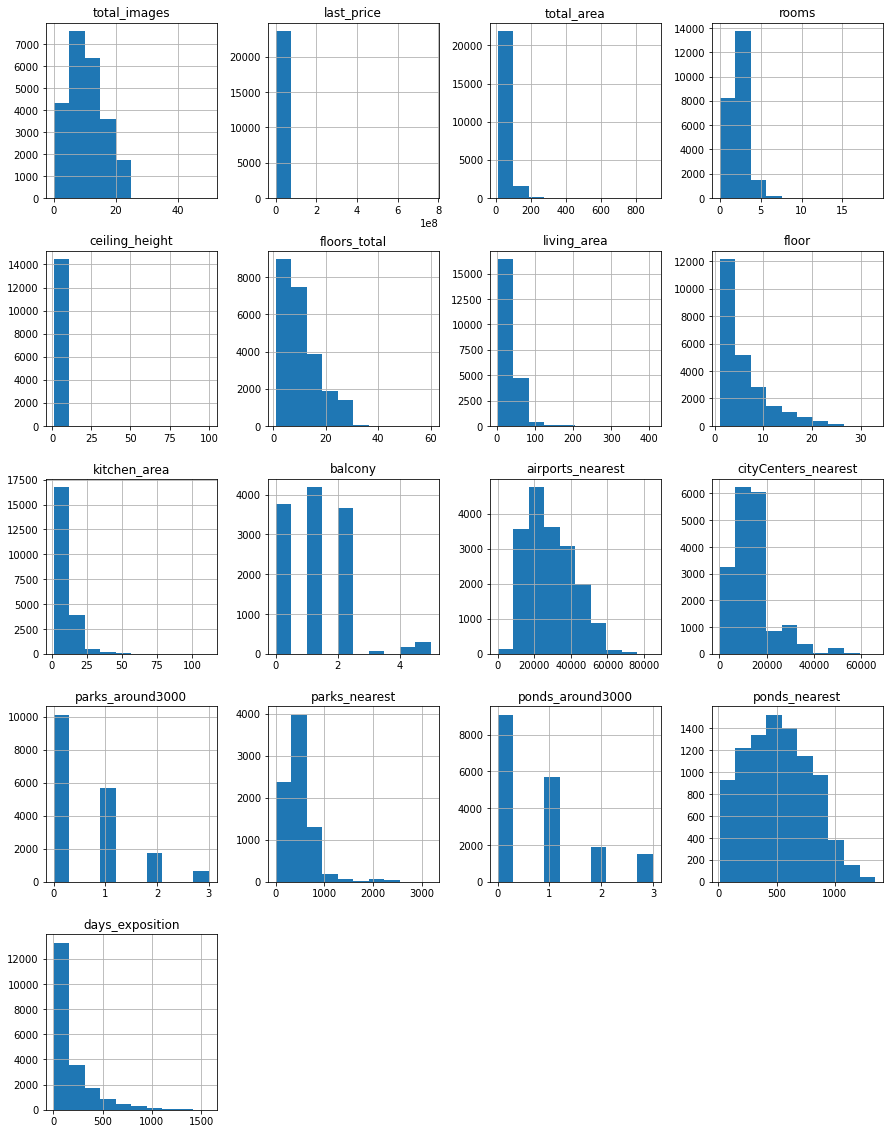

In [ ]:
data.hist(figsize=(15, 20))

### Предобработка данных

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Выведено количество пропущенных значений на каждый столбец датафрейма.

In [ ]:
data_na = data.isna().sum()[data.isna().sum()!=0]
data_na

ceiling_height          9195
floors_total              86
living_area             1903
is_apartment           20924
kitchen_area            2278
balcony                11519
locality_name             49
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000        5518
parks_nearest          15620
ponds_around3000        5518
ponds_nearest          14589
days_exposition         3181
dtype: int64

Отфильтрованы столбцы, оставлены только с пропусками. Далее для удобства анализа выведем только столбцы с пропусками.

In [ ]:
data[data_na.index].head(10)

,ceiling_height,floors_total,living_area,is_apartment,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,2.70,16.0,51.00,NaN,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,NaN,11.0,18.60,NaN,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,NaN,5.0,34.30,NaN,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,NaN,14.0,NaN,NaN,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,3.03,14.0,32.00,NaN,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,NaN,12.0,14.40,NaN,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,NaN,26.0,10.60,NaN,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,NaN,24.0,NaN,NaN,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,NaN,27.0,15.43,NaN,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,2.50,9.0,43.60,NaN,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Разберёмся, какие пропуски можно заполнить, а что можно удалить:**

- ceiling_height достаточно типовой показатель, заполним медианой       
- floors_total в силу малочисленности квартир без указания этажности дома (всего лишь 86) можно без потерь для выводов удалить строки с ними.       
- living_area посчитаем отдельно, умножив там, где пропуски, общую площадь на коэффициент корреляции этого показателя с total_area          
- is_apartment пропуски можно заменить на False, так как подавляющее большинство квартир не являются апартаментами.  

- kitchen_area посчитаем отдельно, умножив там, где пропуски, общую площадь на коэффициент корреляции этого показателя с total_area

- balcony можно заменить пропущенные значения на 0, так как логично предположить, что там, где пропущено, балкона нет, так как его просто не указали.

- locality_name в силу малочисленности квартир без указания населённых пунктов (всего лишь 49) можно без потерь для выводов удалить строки с ними.                           
airports_nearest 
cityCenters_nearest     
parks_around3000        
parks_nearest          
ponds_around3000        
ponds_nearest          
days_exposition

Остальные, вероятно, случайны или же содержат закономерность, которую на этапе предобработки невыяснима. С тем же, где можно заполним пропуски кодом ниже. А затем проверим всё ли выполненно корректно.

Введём вначале простые заполнения/удаления.

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0)
data=data.dropna(subset=['floors_total', 'locality_name'])
data['ceiling_height'] = data['ceiling_height'].fillna(value=data['ceiling_height'].mean())

Теперь расчитаем коэффициенты корреляции общей площади по отношению к жилой и кухонной площадям соответственно.

In [ ]:
data['total_area'].corr(data['living_area'])

0.9397711143610333

In [ ]:
data['total_area'].corr(data['kitchen_area'])

0.6092476784548312

В первом случае корреляция высокая, во втором выше, чем средняя. И то, и то можно использовать для заполнения пропусков. 

Заполним там пропуски, домножив общую площадь на отношение средней конкретной площади к средней общей и округлим до целых в обоих случаях соответственно. 

In [ ]:
data['living_area'] = data['living_area'].fillna(value=round(data['total_area']*(data['living_area'].mean()/data['total_area'].mean())))
data['kitchen_area'] = data['kitchen_area'].fillna(value=round(data['total_area']*(data['kitchen_area'].mean()/data['total_area'].mean())))

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Количество пропусков в скорректированных столбцах теперь равно нулю

In [ ]:
data[data_na.index].head(10)

,ceiling_height,floors_total,living_area,is_apartment,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,2.700000,16.0,51.00,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,2.771283,11.0,18.60,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2.771283,5.0,34.30,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,2.771283,14.0,91.00,False,28.00,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,3.030000,14.0,32.00,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,2.771283,12.0,14.40,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,2.771283,26.0,10.60,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,2.771283,24.0,41.00,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,2.771283,27.0,15.43,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,2.500000,9.0,43.60,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Пропуски заполнены корректно.

Переведём столбцы в иные типы данных там где стоит это сделать.

1) 'first_day_exposition', стоит перевести в datetime так как это дата.

2) 'balcony'стоит перевести в int  так как количество балконов - целое  и в нём нет пропусков.

3) 'airports_nearest' стоит перевести в int так как числа после запятой на уровне погрешности, которой можно пренебречь, а также нет пропусков.

In [ ]:
data['balcony'] = data['balcony'].astype('int', errors='raise')
#data['airports_nearest' ] = data['airports_nearest' ].astype('int', errors='raise')
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

Проверка корректности вызовом общей информации о датафрейме.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [ ]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.700000,16.0,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.771283,11.0,18.60,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.771283,5.0,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.771283,14.0,91.00,9,False,...,28.00,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.030000,14.0,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.771283,12.0,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.771283,26.0,10.60,6,False,...,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.771283,24.0,41.00,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.771283,27.0,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.500000,9.0,43.60,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


В каждом столбце корректный тип данных. Там же где не было возможности заполнить пропуски без потери качества, типы данных не изменялись.

In [ ]:
data['locality_name'].value_counts().tail(20)

поселок городского типа Рябово    1
деревня Курковицы                 1
поселок Володарское               1
деревня Иссад                     1
деревня Кисельня                  1
деревня Шпаньково                 1
поселок Лисий Нос                 1
деревня Сижно                     1
поселок Гладкое                   1
деревня Мануйлово                 1
посёлок Петро-Славянка            1
поселок Рабитицы                  1
деревня Куровицы                  1
посёлок Высокоключевой            1
поселок станции Корнево           1
деревня Рапполово                 1
посёлок Пансионат Зелёный Бор     1
поселок Гаврилово                 1
деревня Лупполово                 1
деревня Большое Рейзино           1
Name: locality_name, dtype: int64

Удалим категории и гоставим только названия.

In [ ]:
#data['locality_name'] = (
#    data['locality_name'].replace('посёлок', 'поселок')
#)

def delete_categories_of_localities(text):
    words = text.split()
    filtered_words = [word for word in words if word[0].isupper()]
    result = ' '.join(filtered_words)
    return result

data['locality_name'] = data['locality_name'].apply(delete_categories_of_localities)

Проверим корректность кода на шапке данных.

In [ ]:
data['locality_name'].value_counts().head(20)

Санкт-Петербург    15651
Мурино               586
Кудрово              470
Шушары               439
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Петергоф             201
Сестрорецк           183
Красное Село         176
Новое Девяткино      143
Сертолово            142
Ломоносов            133
Кириши               125
Бугры                113
Сланцы               112
Волхов               111
Name: locality_name, dtype: int64

И на хвосте:

In [ ]:
data['locality_name'].value_counts().tail(20)

Красносельское    1
Белоостров        1
Гладкое           1
Дзержинского      1
Меньково          1
Терпилицы         1
Петро-Славянка    1
Коммунары         1
Русско            1
Кривко            1
Каложицы          1
Гончарово         1
Корнево           1
Снегирёвка        1
Раздолье          1
Котлы             1
Тихковицы         1
Тойворово         1
Сижно             1
Шум               1
Name: locality_name, dtype: int64

Все работает корректно.

 Устранены неявные дубликаты в названиях населённых пунктов.

Теперь после обработки построим гистаграмму как в начале для обработки аномальных значений.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>],
       [<AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>],
       [<AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_exposition'

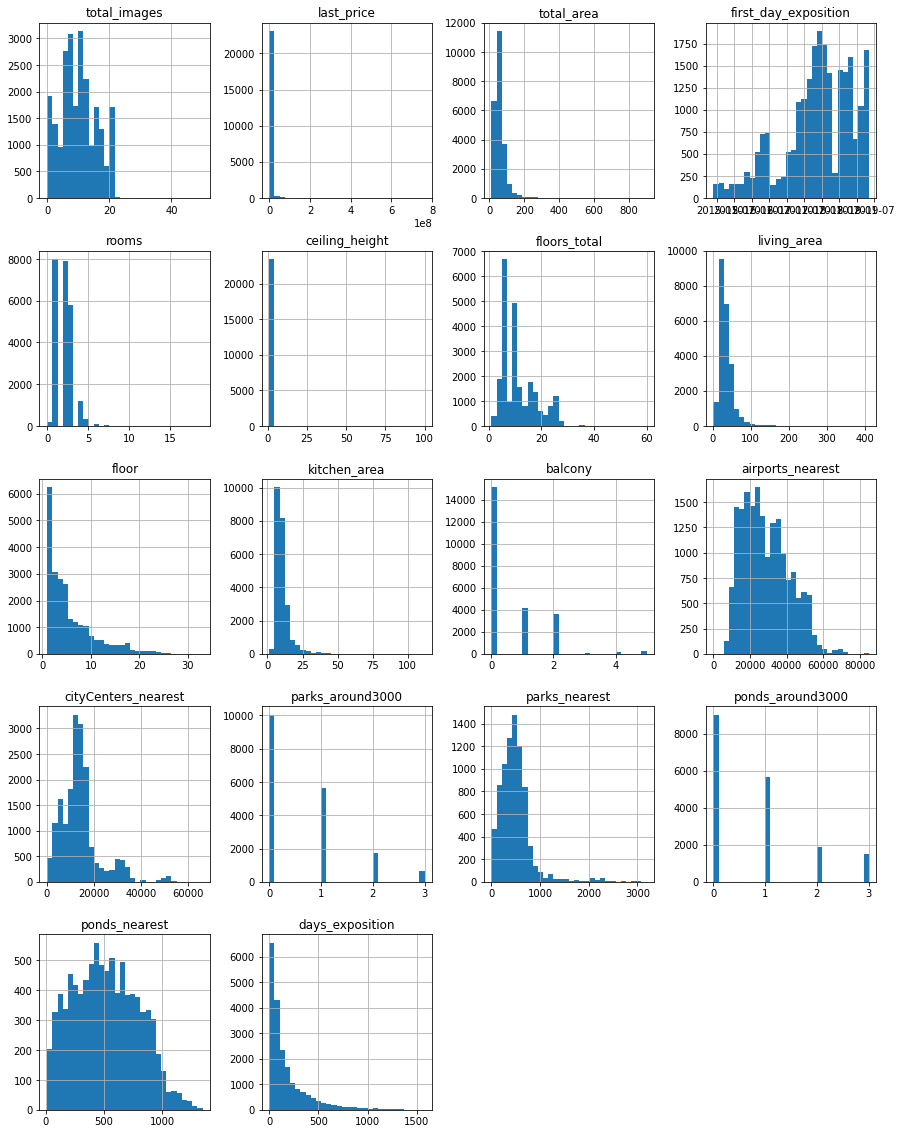

In [ ]:
data.hist(bins=30, figsize=(15, 20))

Явно стоит ограничить высоту квартир, остальные изучим и опишем в дальнейшем при этапе исследовательского анализа данных.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>],
       [<AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>],
       [<AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_exposition'

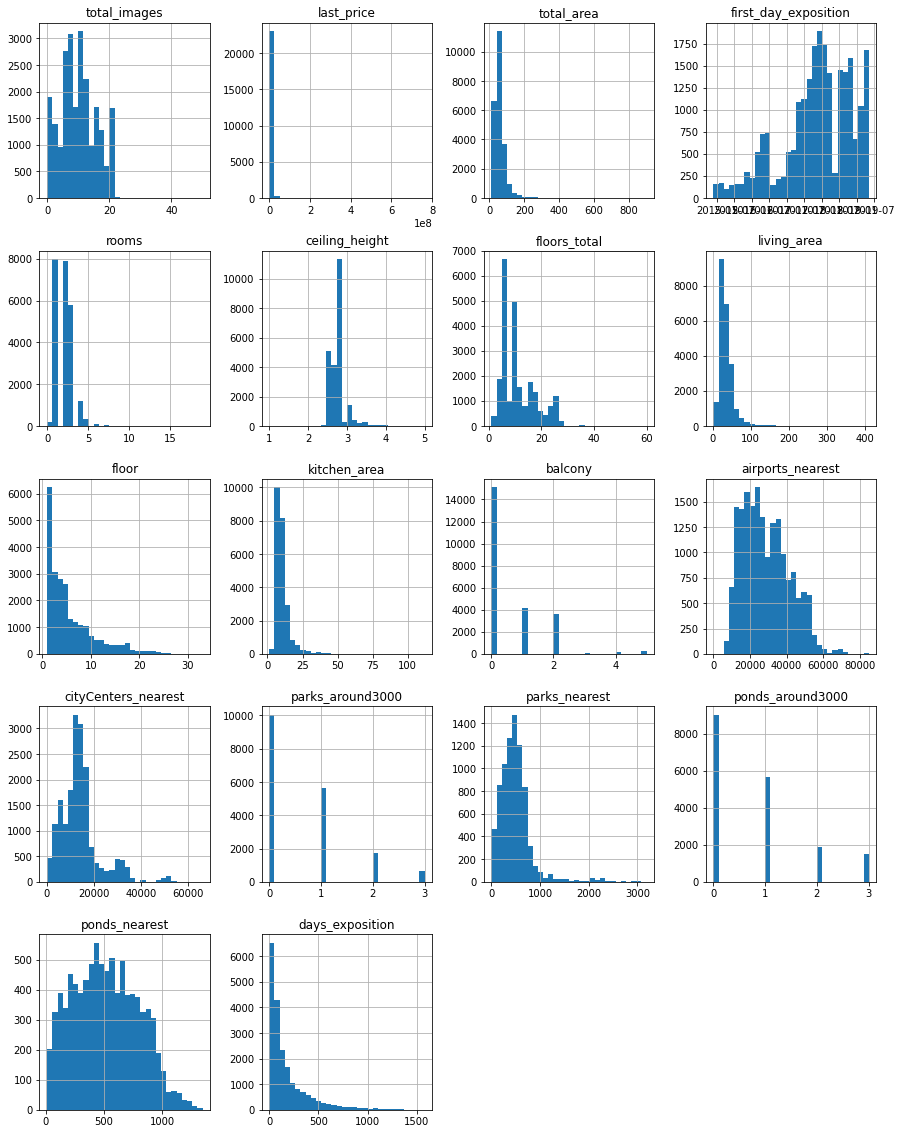

In [ ]:
#data.describe()
new_data = data.query('ceiling_height<=5')
new_data.hist(bins=30, figsize=(15, 20))

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23529 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23529 non-null  int64         
 1   last_price            23529 non-null  float64       
 2   total_area            23529 non-null  float64       
 3   first_day_exposition  23529 non-null  datetime64[ns]
 4   rooms                 23529 non-null  int64         
 5   ceiling_height        23529 non-null  float64       
 6   floors_total          23529 non-null  float64       
 7   living_area           23529 non-null  float64       
 8   floor                 23529 non-null  int64         
 9   is_apartment          23529 non-null  bool          
 10  studio                23529 non-null  bool          
 11  open_plan             23529 non-null  bool          
 12  kitchen_area          23529 non-null  float64       
 13  balcony         

### Добавление в таблицу новых столбцов

Добавим в таблицу новый столбец price_per_meter

In [ ]:
new_data['price_per_meter'] = round(new_data['last_price']/new_data['total_area'], 2)
display(new_data.head(10))

/tmp/ipykernel_550/1949262792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['price_per_meter'] = round(new_data['last_price']/new_data['total_area'], 2)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter
0,20,13000000.0,108.00,2019-03-07,3,2.700000,16.0,51.00,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000.0,40.40,2018-12-04,1,2.771283,11.0,18.60,1,False,...,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000.0,56.00,2015-08-20,2,2.771283,5.0,34.30,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000.0,159.00,2015-07-24,3,2.771283,14.0,91.00,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000.0,100.00,2018-06-19,2,3.030000,14.0,32.00,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00
5,10,2890000.0,30.40,2018-09-10,1,2.771283,12.0,14.40,5,False,...,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79
6,6,3700000.0,37.30,2017-11-02,1,2.771283,26.0,10.60,6,False,...,1,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71
7,5,7915000.0,71.60,2019-04-18,2,2.771283,24.0,41.00,22,False,...,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.69
8,20,2900000.0,33.16,2018-05-23,1,2.771283,27.0,15.43,26,False,...,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.76
9,18,5400000.0,61.00,2017-02-26,3,2.500000,9.0,43.60,7,False,...,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59


Добавим столбец day_of_week день недели публикации объявления (0 — понедельник, 1 — вторник и так далее).

In [ ]:
new_data['day_of_week'] = new_data['first_day_exposition'].dt.weekday
display(new_data.head(10))

/tmp/ipykernel_550/2919077519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['day_of_week'] = new_data['first_day_exposition'].dt.weekday


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_week
0,20,13000000.0,108.00,2019-03-07,3,2.700000,16.0,51.00,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3
1,7,3350000.0,40.40,2018-12-04,1,2.771283,11.0,18.60,1,False,...,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1
2,10,5196000.0,56.00,2015-08-20,2,2.771283,5.0,34.30,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3
3,0,64900000.0,159.00,2015-07-24,3,2.771283,14.0,91.00,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4
4,2,10000000.0,100.00,2018-06-19,2,3.030000,14.0,32.00,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1
5,10,2890000.0,30.40,2018-09-10,1,2.771283,12.0,14.40,5,False,...,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79,0
6,6,3700000.0,37.30,2017-11-02,1,2.771283,26.0,10.60,6,False,...,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71,3
7,5,7915000.0,71.60,2019-04-18,2,2.771283,24.0,41.00,22,False,...,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.69,3
8,20,2900000.0,33.16,2018-05-23,1,2.771283,27.0,15.43,26,False,...,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.76,2
9,18,5400000.0,61.00,2017-02-26,3,2.500000,9.0,43.60,7,False,...,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59,6


Также добавим столбецы с месяцами публикации и с годоами публицации соответственно - number_of_month, number_of_year.

In [ ]:
new_data['number_of_month'] = pd.DatetimeIndex(new_data['first_day_exposition']).month
new_data['number_of_year'] = pd.DatetimeIndex(new_data['first_day_exposition']).year
display(new_data.head(10))

/tmp/ipykernel_550/3916146971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['number_of_month'] = pd.DatetimeIndex(new_data['first_day_exposition']).month
/tmp/ipykernel_550/3916146971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['number_of_year'] = pd.DatetimeIndex(new_data['first_day_exposition']).year


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_week,number_of_month,number_of_year
0,20,13000000.0,108.00,2019-03-07,3,2.700000,16.0,51.00,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.771283,11.0,18.60,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.771283,5.0,34.30,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,2.771283,14.0,91.00,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.030000,14.0,32.00,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018
5,10,2890000.0,30.40,2018-09-10,1,2.771283,12.0,14.40,5,False,...,NaN,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018
6,6,3700000.0,37.30,2017-11-02,1,2.771283,26.0,10.60,6,False,...,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71,3,11,2017
7,5,7915000.0,71.60,2019-04-18,2,2.771283,24.0,41.00,22,False,...,11634.0,0.0,NaN,0.0,NaN,NaN,110544.69,3,4,2019
8,20,2900000.0,33.16,2018-05-23,1,2.771283,27.0,15.43,26,False,...,NaN,NaN,NaN,NaN,NaN,189.0,87454.76,2,5,2018
9,18,5400000.0,61.00,2017-02-26,3,2.500000,9.0,43.60,7,False,...,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59,6,2,2017


Добавим столбец type_of_floor, показывающий тип этажа ("первый", "последний", "другой")

In [ ]:
def type_of_floor(new_data):
    if new_data['floor']==1:
        return 'первый'
    if new_data['floor']==new_data['floors_total']:
        return 'последний'
    return 'другой'
new_data['type_of_floor'] = new_data.apply(type_of_floor, axis=1)
display(new_data.head(10))

/tmp/ipykernel_550/1994125037.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['type_of_floor'] = new_data.apply(type_of_floor, axis=1)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_week,number_of_month,number_of_year,type_of_floor
0,20,13000000.0,108.00,2019-03-07,3,2.700000,16.0,51.00,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,2.771283,11.0,18.60,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.771283,5.0,34.30,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,2.771283,14.0,91.00,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.030000,14.0,32.00,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,2.771283,12.0,14.40,5,False,...,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,2.771283,26.0,10.60,6,False,...,0.0,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой
7,5,7915000.0,71.60,2019-04-18,2,2.771283,24.0,41.00,22,False,...,0.0,NaN,0.0,NaN,NaN,110544.69,3,4,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,2.771283,27.0,15.43,26,False,...,NaN,NaN,NaN,NaN,189.0,87454.76,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.500000,9.0,43.60,7,False,...,0.0,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой


Добавим также столбец city_сenters_nearest_km, в котором будет расстояния в км до центра города, округленные о ближайшего целого.

In [ ]:
new_data['city_сenters_nearest_km'] = round(new_data['cityCenters_nearest']/1000, 0)
display(new_data.head(10))

/tmp/ipykernel_550/1295832881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['city_сenters_nearest_km'] = round(new_data['cityCenters_nearest']/1000, 0)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_week,number_of_month,number_of_year,type_of_floor,city_сenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.700000,16.0,51.00,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.771283,11.0,18.60,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.771283,5.0,34.30,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.771283,14.0,91.00,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.030000,14.0,32.00,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.771283,12.0,14.40,5,False,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.771283,26.0,10.60,6,False,...,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.771283,24.0,41.00,22,False,...,NaN,0.0,NaN,NaN,110544.69,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.771283,27.0,15.43,26,False,...,NaN,NaN,NaN,189.0,87454.76,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.500000,9.0,43.60,7,False,...,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0


### Исследовательский анализ данных

Для удобства и наглядности выведем название колонок в итоговом наборе данных.

In [ ]:
new_data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_meter', 'day_of_week',
       'number_of_month', 'number_of_year', 'type_of_floor',
       'city_сenters_nearest_km'],
      dtype='object')

**Изучим и опишем параметры:**

  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего парка.

<AxesSubplot:>

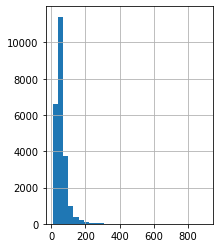

In [ ]:
new_data['total_area'].hist(bins=30, figsize=(3, 4))

In [ ]:
new_data['total_area'].describe()

count    23529.000000
mean        60.288990
std         35.528528
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Описание по общей площади:  Пик в районе 40-50 метров квадратных, может означать соответствие какому-то стандарту или типовой застройке, поэтому его некорректно удалять. А вот квартир с огромной площадью несколько, их можно считать выбросами, так как они относятся к крайне элитному жилью, а оно имеет свои специфические законы ценообразования. Более того на графике видно, что квартир больше 300 метров квадратных практически нет. Проверим это:

In [ ]:
new_data.query('total_area>300').shape

(59, 28)

Гипотеза подтвердилась, поэтому удаляем квартиры площадь, которых больше 300 метров квадратных

In [ ]:
new_data = new_data.query('total_area<=300')

Рассмотрим жилую площадь.

<AxesSubplot:>

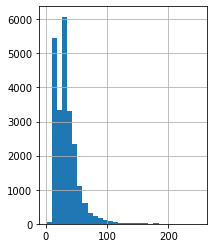

In [ ]:
new_data['living_area'].hist(bins=30, figsize=(3, 4))

In [ ]:
new_data['living_area'].describe()

count    23470.000000
mean        34.076265
std         19.753598
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        250.000000
Name: living_area, dtype: float64

In [ ]:
new_data.query('living_area>200').shape

(4, 28)

Вывод по жилой площади: есть просадка после 20 с небольшим метров квадратных. Также может быть связанно с особенностями конъюктуры и законодательства - некорректно изменять. А вот квартир с жилплощадью больше 200 практически нет, это тоже явно крайне элитное жильё, в той же логике сократим его, как аномалию.

In [ ]:
new_data = new_data.query('living_area<=200')

Расмотрим площади кухни:

<AxesSubplot:>

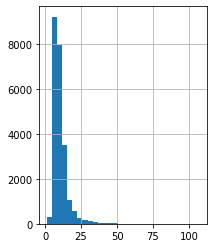

In [ ]:
new_data['kitchen_area'].hist(bins=30, figsize=(3, 4))

In [ ]:
new_data['kitchen_area'].describe()

count    23466.000000
mean        10.408000
std          5.665769
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

In [ ]:
new_data.query('kitchen_area>50').shape

(37, 28)

Вывод по площади кухни: Провал в значениях слево объясняется стандартами и нормами строительства кухонь (чтобы не слишком маленькие). А вот больше 50 метров мы сократим так, как их мало и они искажают картину и по аналогии с двумя пунктами выше.

In [ ]:
new_data = new_data.query('kitchen_area<=50')

<AxesSubplot:>

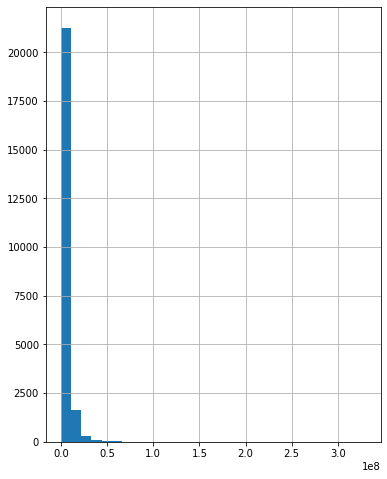

In [ ]:
new_data['last_price'].hist(bins=30, figsize=(6, 8))

In [ ]:
new_data['last_price'].describe()

count    2.342900e+04
mean     6.228353e+06
std      7.437953e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

Вывод по цене объекта - гистограмма соответствует в достаточной степени ожидаемым особенностям рынка(что стоимость большинства квартир близка, и тут точно не стоит ничего менять, так как этот показатель самый важный.

<AxesSubplot:>

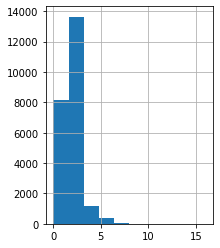

In [ ]:
new_data['rooms'].hist(bins=10, figsize=(3, 4))

In [ ]:
new_data['rooms'].describe()

count    23429.000000
mean         2.056255
std          1.041725
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

In [ ]:
new_data.query('rooms>6').shape

(58, 28)

Вывод по количеству комнат: отсечение вариантов с большим количеством комнат(больше 6), которых крайне мало, и которые явно выбиваются из общей картины, продуктивно. Это и сделаем.

In [ ]:
new_data = new_data.query('rooms<=6')

<AxesSubplot:>

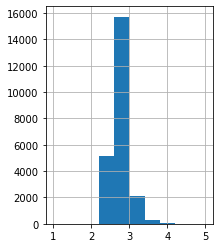

In [ ]:
new_data['ceiling_height'].hist(bins=10, figsize=(3, 4))

In [ ]:
new_data['ceiling_height'].describe()

count    23371.000000
mean         2.739979
std          0.209858
min          1.000000
25%          2.600000
50%          2.771283
75%          2.771283
max          5.000000
Name: ceiling_height, dtype: float64

In [ ]:
new_data.query('ceiling_height>4').shape

(35, 28)

Вывод по высоте потолков: отсечение на этапе предобработки вариантов с большим количеством комнат(меньше 5 метров), которых было крайне мало, и которые явно выбивались из общей картины, продуктивно. Но судя по данным и здравому смыслу, лучше ограничить 4 метрами.

In [ ]:
new_data = new_data.query('ceiling_height<=4')

<AxesSubplot:>

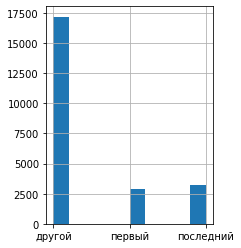

In [ ]:
new_data['type_of_floor'].hist(bins=10, figsize=(3, 4))

По типу этажа картина логична в том, промежуточных этажей гораздо больше. Разница в количестве между "первым" и "последним" этажими, вероятно объясняется особенностью учета одноэтажных домов и находится на уровне погрешности, которой можно пренебречь.

In [ ]:
new_data.shape

(23336, 28)

<AxesSubplot:>

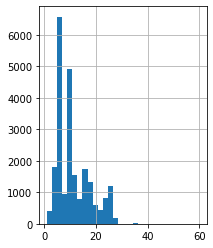

In [ ]:
new_data['floors_total'].hist(bins=30, figsize=(3, 4))

In [ ]:
new_data['floors_total'].describe()

count    23336.000000
mean        10.715975
std          6.599159
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [ ]:
new_data.query('floors_total>30').shape

(31, 28)

По общему количеству этажей аномалии связаны не с выбросами, а с большим количеством типового жилья, например сталинки или пятиэтажные хрущёвки. А вот дома высотой больше 30 этажей крайне редки и выбиваются из общей картины и делают график менее информативным. Это аномалия, которую скорректируем.

In [ ]:
new_data = new_data.query('floors_total<=30')

<AxesSubplot:>

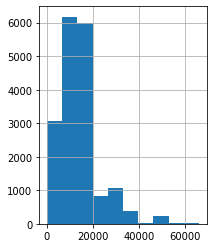

In [ ]:
new_data['cityCenters_nearest'].hist(bins=10, figsize=(3, 4))

Что касается расстояния до центра города, то итоги логичные, так как ближе к центру плотность застройки расстет, а "холмик" справа, это близлежащие территории, например поселки и деревни.

<AxesSubplot:>

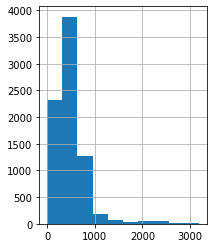

In [ ]:
new_data['parks_nearest'].hist(bins=10, figsize=(3, 4)) 

Что касается расстояния до ближайших парков, то оно выражает нормальное распределение, и поэтому точно не нуждается в корректировках.


Проверим, что удалено не слишком много данных.

In [ ]:
new_data.shape[0]/data.shape[0]

0.9889666878845745

При удалении (где необходимо) аномалий, 99% данных сохранены. Теперь посмотрим насколько наглядней стали графики.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>],
       [<AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>],
       [<AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_exposition'}

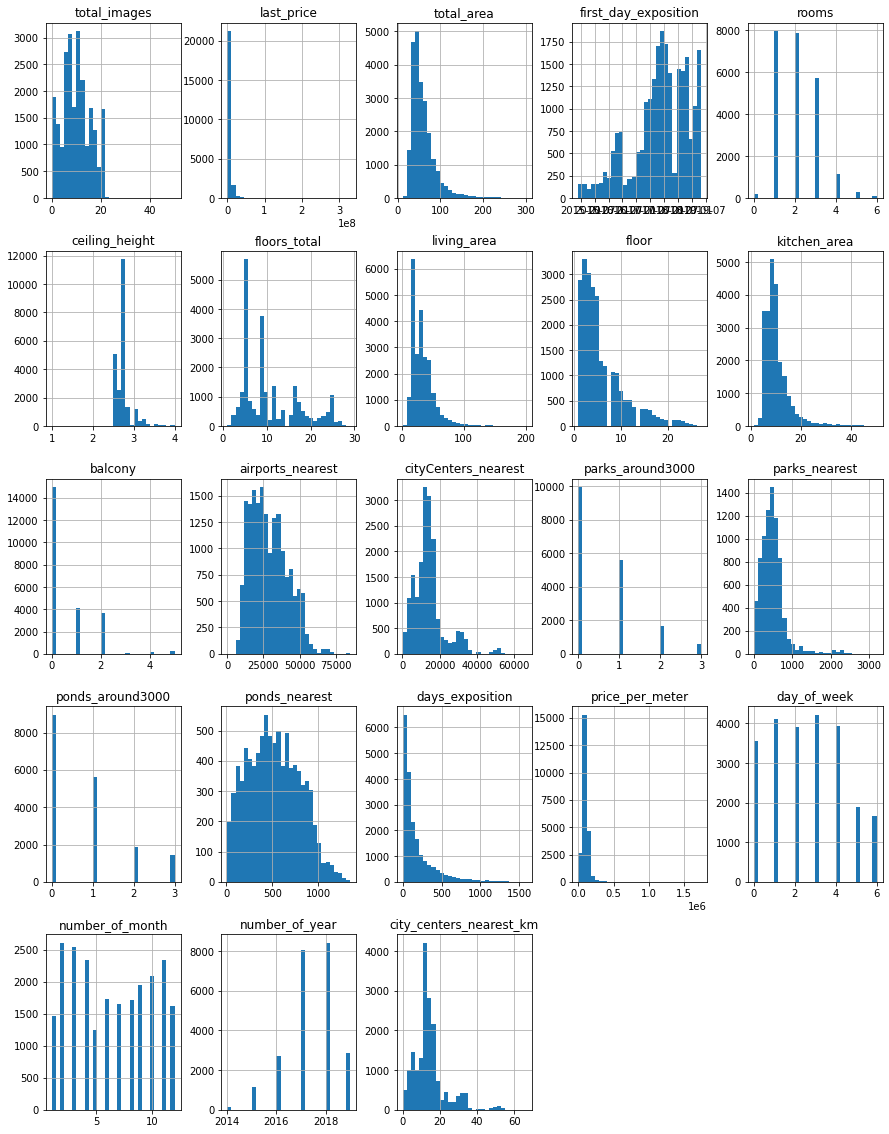

In [ ]:
new_data.hist(bins=30, figsize=(15, 20))

Рост качества данных в результате обработки нагляден.

**Изучение того, как быстро продовались квартиры:**

Гистограмма ниже по дням с момента старта торгов до продажи соответствует распределению Пуассона, поэтому всё корректно.

<AxesSubplot:>

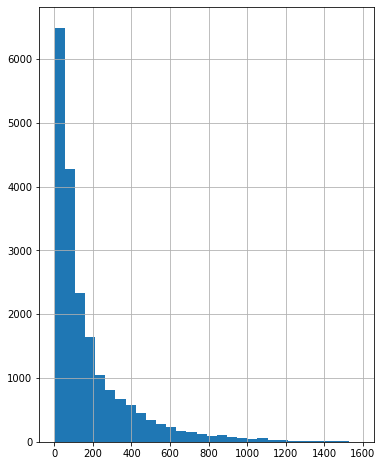

In [ ]:
new_data['days_exposition'].hist(bins=30, figsize=(6, 8)) 

In [ ]:
print('Медиана:', new_data['days_exposition'].median())

Медиана: 95.0


In [ ]:
print('Среднее арифмитическое:', new_data['days_exposition'].mean())

Среднее арифмитическое: 179.94835355285963


In [ ]:
new_data['days_exposition'].describe()

count    20195.000000
mean       179.948354
std        218.998908
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

Вывод: Типичные продажи от 45 до 230 дней. Быстрые - меньше приблизительно 23 дней. Долгие - больше приблизительно 880 дней. 

**Выявление факторов, которые больше всего влияют на полную стоимость объекта:**

Для удобства и наглядности выведем название колонок в итоговом наборе данных.

In [ ]:
new_data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_meter', 'day_of_week',
       'number_of_month', 'number_of_year', 'type_of_floor',
       'city_сenters_nearest_km'],
      dtype='object')

Изучим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Для этого построим матрицу графиков для количественных переменных, нас интересует только первая строчка.

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='living_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='kitchen_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='kitchen_area'>,
        <AxesSubp

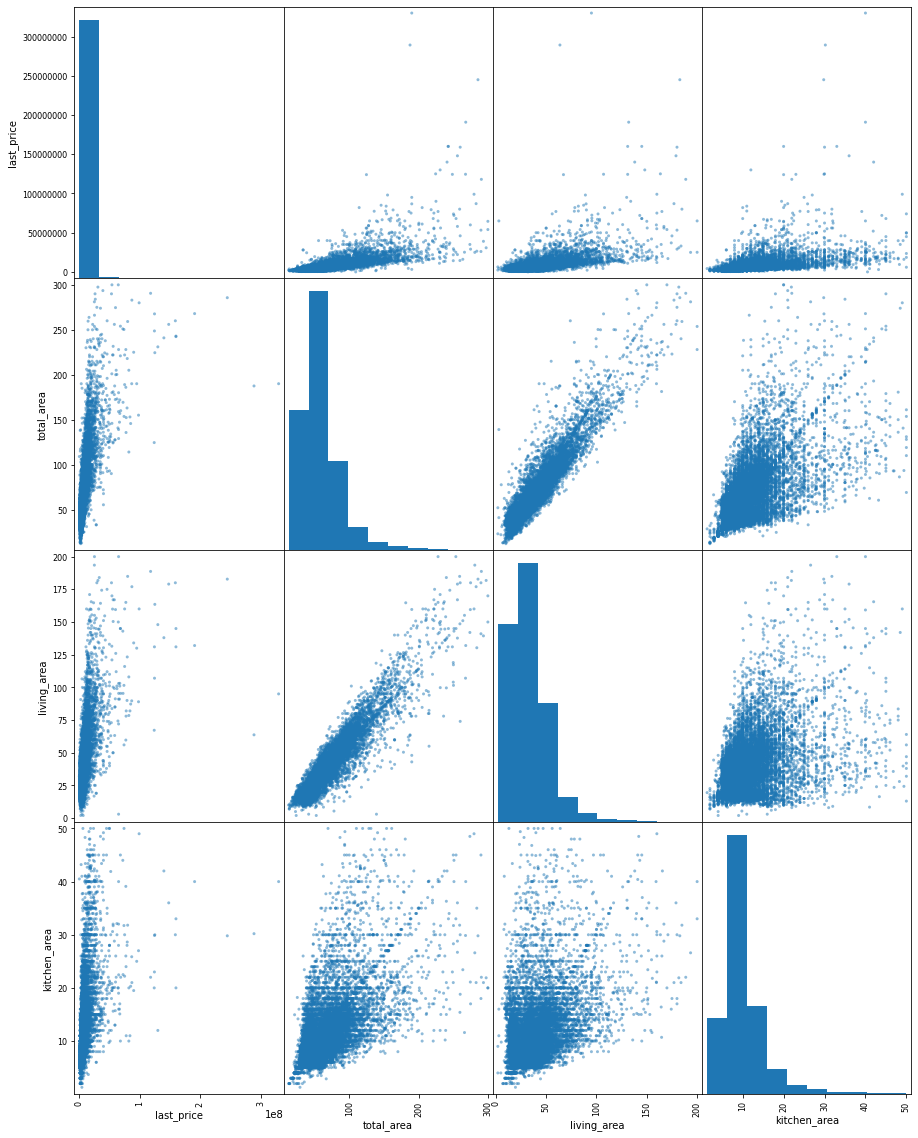

In [ ]:
pd.plotting.scatter_matrix(new_data[['last_price','total_area','living_area','kitchen_area']], figsize=(15, 20))

C площадями разных типов у общей цены корреляция есть, но небольшая, проверим эту гипотезу по коэффициентам Пирсона.

In [ ]:
quantaty_parameters = new_data[['last_price','total_area','living_area','kitchen_area']]
quantaty_parameters.corr()

,last_price,total_area,living_area,kitchen_area
last_price,1.000000,0.671330,0.591839,0.508806
total_area,0.671330,1.000000,0.936990,0.627801
living_area,0.591839,0.936990,1.000000,0.433126
kitchen_area,0.508806,0.627801,0.433126,1.000000


**Вывод: Общая цена коррелирует с всеми площадями (общей, жилой, кухонной), но слабо.**

**Далее проработаем категориальные переменные.**

Для начала сделаем 2 полезные функции.

In [ ]:
def pivot (column, df):
    df = df.pivot_table(index=column, values='last_price', aggfunc='mean')
    return df
def bar (df):
    i = df.index
    df['i'] = i
    return df.plot(x='i', y='last_price', kind='bar')

Зависимость от числа комнат - существенная, судя по диаграмме ниже.

<AxesSubplot:xlabel='i'>

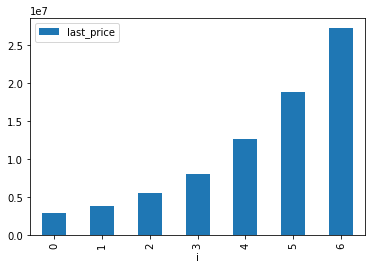

In [ ]:
bar(pivot('rooms', new_data))

А из диаграммы ниже следует, что первый этаж стоит дешевлей любого другого, что логично из-за шума, а последний не выделяется.

<AxesSubplot:xlabel='i'>

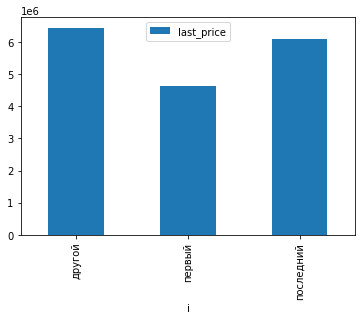

In [ ]:
bar(pivot('type_of_floor', new_data))

'day_of_week','number_of_month', 'number_of_year'

Из двух диаграм ниже видно, что день недели и месяц даты размещения не оказывает существенного влияния на цену.

<AxesSubplot:xlabel='i'>

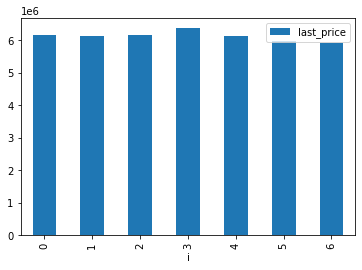

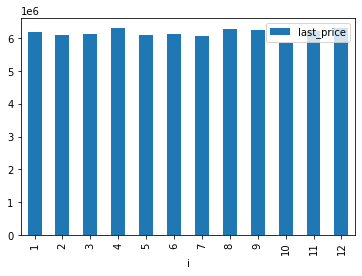

In [ ]:
bar(pivot('day_of_week', new_data))
bar(pivot('number_of_month', new_data))

А вот год оказывает - общая тенденция к снижению.

<AxesSubplot:xlabel='i'>

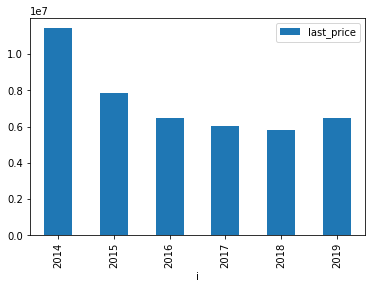

In [ ]:
bar(pivot( 'number_of_year', new_data))

**Подсчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

Вначале получим список населённых пунктов с наибольшим количеством объявлений.

In [ ]:
top_10_locality = pd.DataFrame(data=new_data['locality_name'].value_counts().head(10), columns=['locality_name']).index
display(top_10_locality)

Index(['Санкт-Петербург', 'Мурино', 'Кудрово', 'Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'Парголово', 'Гатчина', 'Выборг'],
      dtype='object')

Преобразуем new_data в top_10_locality_data и убедимся, что всё корректно.

In [ ]:
top_10_locality_data = new_data.query('locality_name in @top_10_locality').reset_index(drop=True)
top_10_locality_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_week,number_of_month,number_of_year,type_of_floor,city_сenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.771283,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.771283,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.771283,14.0,91.0,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


Теперь составим необходимую таблицу.

In [ ]:
top_10_locality_data = top_10_locality_data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count','mean'])
top_10_locality_data.columns =  ['number_of_advertisements','average_price_per_meter']
display(top_10_locality_data.sort_values(by='average_price_per_meter', ascending=False))

,number_of_advertisements,average_price_per_meter
locality_name,,
Санкт-Петербург,15417,113851.170624
Пушкин,363,102860.753361
Кудрово,470,95260.846128
Парголово,326,90332.262638
Мурино,584,86018.110873
Шушары,439,78551.344647
Колпино,337,75333.295816
Гатчина,306,68757.678399
Всеволожск,397,68605.572947


По этой таблице видно, что разница в стоимости квадратного метра почти в два раза отличается в самом дорогом (Санкт-Петербург) и самом дешевом населённых пунктах (Выборг), промежуток между ними распределён остаточно равномерно.

**Проработаем квартиры в Санкт-Петербурге через призму удаленности от центра.**

In [ ]:
S_P_data = new_data.query('locality_name=="Санкт-Петербург"').reset_index(drop=True)
#S_P_data['city_сenters_nearest_km'] = S_P_data['city_сenters_nearest_km'].astype('int')
S_P_data = S_P_data.pivot_table(index='city_сenters_nearest_km', values='last_price', aggfunc='mean').reset_index(drop=False)
S_P_data.columns = ['km_to_city_centre', 'average_price']
display(S_P_data)

,km_to_city_centre,average_price
0,0.0,2.910389e+07
1,1.0,1.980313e+07
2,2.0,1.561758e+07
3,3.0,1.042996e+07
4,4.0,1.153022e+07
5,5.0,1.212463e+07
6,6.0,1.304810e+07
7,7.0,1.378279e+07
8,8.0,9.062580e+06
9,9.0,6.956583e+06


Теперь изобразим результат в виде графика.

<AxesSubplot:xlabel='km_to_city_centre'>

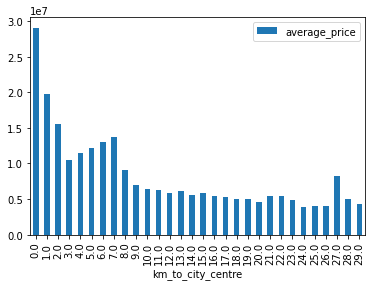

In [ ]:
S_P_data.plot(x='km_to_city_centre', y='average_price', kind='bar')

Вывод:видна явная динамика увеличения стоимости при приближению к центру. 

### Общий вывод

Ключевые факторы:

- По Санкт-Петербургу выявлена существенная системная динамика увеличения стоимости квартир при приближении к центру.
- Также значительно возрастает стоимость при возрастании числа комнат.
- Первый этаж стоит дешевле любого другого, а последний не выделяется. 
- Также год оказывает заметное влияние - общая тенденция к снижению (2014-2018 года), 2019 - рост.
Второстепенные факторы:
- Общая цена коррелирует также с всеми площадями (общей, жилой, кухонной), но слабо.

Маловажные факторы:
- День недели и месяц даты размещения не оказывает существенного влияния на цену.

И отдельно про сравнение населенных пунктов: 
- Разница в стоимости квадратного метра почти в 2 раза отличается в самом дорогом (Санкт-Петербург) и самом дешевом населенных пунктах (Выборг) из топ 10 по количеству объявлений, промежуток между ними распределен достаточно равномерно.

Потенциальные точки роста и дополнительные возможные исследования:
- Исследование зависимости стоимости жилья в населённом пункте от количества жителей в нём.
- Отдельное исследование для элитного жилья, которое в силу специфичности и малого количества не рассматривалось подробно в этом исследовании.
- Собирание всех выявленных фокторов в единную формулу, вероятно, с участием машинного обучения.